In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline

In [2]:
JD = pd.read_json('IndeedJDs.json')
JD.head()

,company,d3,dl,hadoop,mapreduce,matlab,ml,nlp,nn,python,r,sas,spark,sql,sv,tab,tf,title,url
0,Production Modeling Corporation,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Data Scientist ( NO C2C ),http://www.indeed.com/cmp/Production-Modeling-...
1,Twitch,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Data Scientist,http://www.indeed.com/rc/clk?jk=85e94cc9adaabf...
2,Ubisoft,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,"Data Scientist, Marketing Analytics",http://www.indeed.com/rc/clk?jk=30768ffa71fdfb...
3,Doximity,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,Data Scientist - Growth,http://www.indeed.com/rc/clk?jk=788fdeb8484613...
4,Zynga,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,"Data Scientist, Central Product Management",http://www.indeed.com/rc/clk?jk=41c2b86261039a...


In [3]:
keys = ['sql', 'python', 'matlab', 'r', 'ml', 'spark', 'hadoop', 'dl',
        'mapreduce', 'tf', 'd3', 'sv', 'nn', 'nlp', 'sas', 'tab']
skills = ['SQL', 'Python', 'Matlab', 'R', 'Machine Learning', 'Spark', 'Hadoop',
          'Deep Learning', 'MapReduce', 'TensorFlow', 'd3', 'Support Vector', 
          'Neural Network', 'NLP', 'SAS', 'Tableau']

JD.rename(columns=dict(zip(keys, skills)), inplace=True)

In [4]:
JD.mean().sort_values(0, ascending=False)

Machine Learning    0.269311
SQL                 0.118998
Python              0.116910
R                   0.070981
Spark               0.066806
Deep Learning       0.043841
Hadoop              0.041754
SAS                 0.029228
Tableau             0.025052
MapReduce           0.014614
NLP                 0.012526
TensorFlow          0.006263
Support Vector      0.006263
Matlab              0.006263
Neural Network      0.004175
d3                  0.002088
dtype: float64

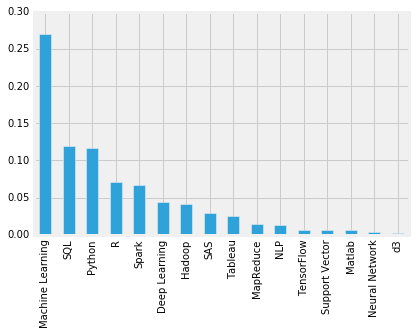

In [5]:
JD.mean().sort_values(0, ascending=False).plot(kind='bar')

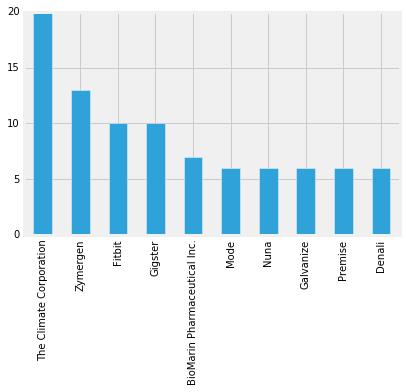

In [6]:
JD.company.value_counts().head(10).plot(kind='bar')